In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
S0 = 100    # initial stock price
K = 100     # strike price
r = 0.02    # risk-free rate
sigma = 0.2 # volatility
T = 1.0     # time to maturity (1 year)
N = 200_000 # number of simulations


In [3]:
# Simulate terminal stock price using GBM
Z = np.random.normal(0, 1, N)
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

In [4]:

# Payoff of European Call
payoff = np.maximum(ST - K, 0)


In [5]:
# Discounted payoff
discounted = np.exp(-r * T) * payoff


In [6]:
# Monte Carlo price estimate
price = np.mean(discounted)
stderr = np.std(discounted, ddof=1) / np.sqrt(N)

print(f"Monte Carlo European Call Price: {price:.4f} ± {1.96*stderr:.4f} (95% CI)")

Monte Carlo European Call Price: 8.8580 ± 0.0602 (95% CI)


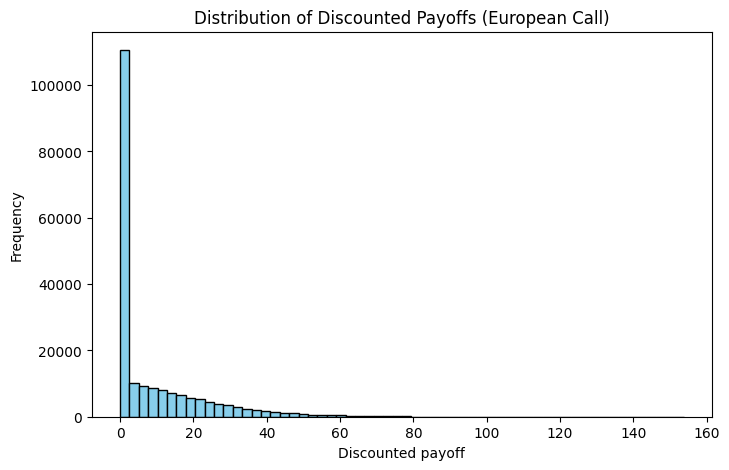

In [7]:
# Visualize distribution of discounted payoffs
plt.figure(figsize=(8,5))
plt.hist(discounted, bins=60, color="skyblue", edgecolor="black")
plt.title("Distribution of Discounted Payoffs (European Call)")
plt.xlabel("Discounted payoff")
plt.ylabel("Frequency")
plt.show()


📌 Conclusion

The option price is the average discounted payoff across all simulations.

The confidence interval shrinks as N increases (error ∝ 1/√N).

This approach is flexible: we can handle exotic options or multi-factor models easily by sampling.